## **1. Import libraries**

In [1]:
! pip install lazypredict

Tpot is the alternative of Lazypredict, so no need to install it. And the reason why we did that is because 
1) There's a problem with the version of scikit-learn that LazyPredict relies on. (might be a newer version installed in environment that's causing compatibility issues.) 
This could happen if another package requires the newer version of scikit-learn, preventing you from downgrading it successfully. To troubleshoot, you can check for conflicts with other packages, ensure LazyPredict is using the correct version of scikit-learn, and explore alternative solutions if needed.

In [2]:
!pip install tpot

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

## **2. Load the data set**


In [4]:
df = pd.read_csv('MgluR5_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(1972, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(1972, 149)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [9]:
from tpot import TPOTRegressor

# Define and build the TPOT Regressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, Y_train)

# Evaluate the TPOT Regressor
predictions_train = tpot.predict(X_train)
predictions_test = tpot.predict(X_test)

                                                                             
Generation 1 - Current best internal CV score: -0.856308933301969
                                                                             
Generation 2 - Current best internal CV score: -0.8499309899147406
                                                                             
Generation 3 - Current best internal CV score: -0.8454590753270054
                                                                              
Generation 4 - Current best internal CV score: -0.8408436920966862
                                                                              
Generation 5 - Current best internal CV score: -0.8408436920966862
                                                                              
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.3, min_samples_leaf=1, min_samples_split=9, n_estimators=100)


In [10]:
# Performance table of the training set (80% subset)
predictions_train

array([-3.01129602, -3.5879942 , -2.76339956, ..., -3.70589169,
       -2.86555375, -3.22731871])

In [11]:
# Convert predictions_test array to a DataFrame
predictions_test_df = pd.DataFrame(predictions_test, columns=["Predicted Target"])

# Display the DataFrame
predictions_test_df


,Predicted Target
0,-2.469145
1,-3.049350
2,-1.863674
3,-2.676762
4,-3.180288
...,...
390,-2.537444
391,-2.161257
392,-2.267634
393,-2.538109


## **5. Data visualization of model performance**

[(0.0, 1.0)]

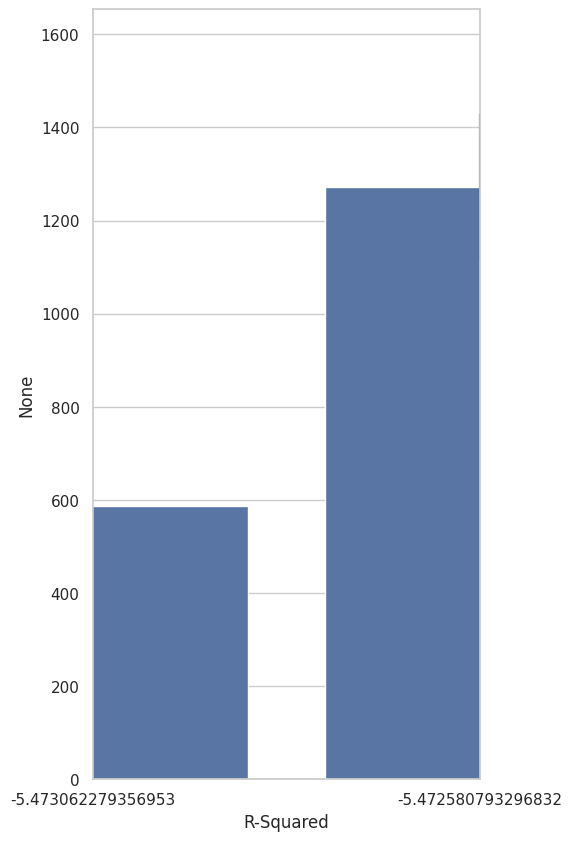

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert predictions_train array to a DataFrame
predictions_train_df = pd.DataFrame(predictions_train, columns=["R-Squared"])

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train_df.index, x="R-Squared", data=predictions_train_df)
ax.set(xlim=(0, 1))

In [13]:
import matplotlib.pyplot as plt

# Print the content of predictions_train to understand its structure
print(predictions_train)

# Plotting code based on the actual structure of predictions_train
# Modify this part based on the actual structure of predictions_train
if isinstance(predictions_train, list):
    # If predictions_train is a list of tuples (model_name, r_squared_value)
    rsquared_values = [result[1] for result in predictions_train]
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(rsquared_values)), rsquared_values)
    plt.xlabel('Model')
    plt.ylabel('R-Squared Value')
    plt.title('R-Squared Values for Different Models (Training Set)')
    plt.xticks(range(len(predictions_train)), [result[0] for result in predictions_train], rotation=90)
    plt.show()
elif isinstance(predictions_train, dict):
    # If predictions_train is a dictionary with model names as keys and r_squared values as values
    plt.figure(figsize=(10, 5))
    plt.bar(predictions_train.keys(), predictions_train.values())
    plt.xlabel('Model')
    plt.ylabel('R-Squared Value')
    plt.title('R-Squared Values for Different Models (Training Set)')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("The structure of predictions_train is not recognized. Unable to plot R-squared values.")


[-3.01129602 -3.5879942  -2.76339956 ... -3.70589169 -2.86555375
 -3.22731871]
The structure of predictions_train is not recognized. Unable to plot R-squared values.


/tmp/ipykernel_17233/2764076103.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, '-5.473062279356953'),
 Text(1, 0, '-5.472580793296832'),
 Text(2, 0, '-5.471466505457699'),
 Text(3, 0, '-5.457364536866486'),
 Text(4, 0, '-5.456926822266374'),
 Text(5, 0, '-5.45204527415087'),
 Text(6, 0, '-5.435775490453484'),
 Text(7, 0, '-5.4117107504051365'),
 Text(8, 0, '-5.40361214673859'),
 Text(9, 0, '-5.369999644827984'),
 Text(10, 0, '-5.3537188734184395'),
 Text(11, 0, '-5.345533559632046'),
 Text(12, 0, '-5.2057805053655235'),
 Text(13, 0, '-5.168968492134228'),
 Text(14, 0, '-5.095816965250952'),
 Text(15, 0, '-4.716643961768774'),
 Text(16, 0, '-4.699092429923934'),
 Text(17, 0, '-4.692570199110062'),
 Text(18, 0, '-4.67987444078647'),
 Text(19, 0, '-4.6734217369293605'),
 Text(20, 0, '-4.545889138216398'),
 Text(21, 0, '-4.539437466135882'),
 Text(22, 0, '-4.5050142998918234'),
 Text(23, 0, '-4.50289511589214'),
 Text(24, 0, '-4.479062259791138'),
 Text(25, 0, '-4.477710025009171'),
 Text(26, 0, '-4.459866779176196'),
 Text(27, 0, '-4.453875901869346'),
 

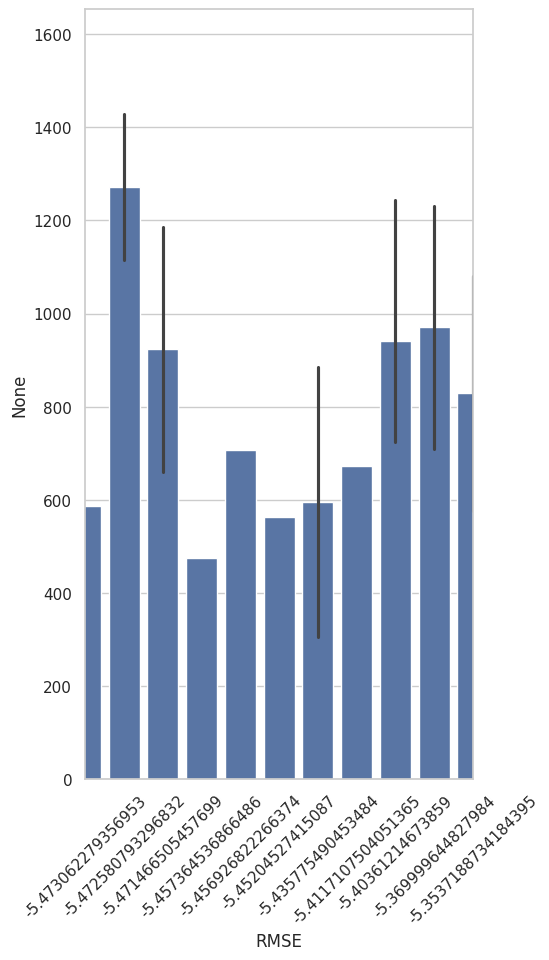

In [17]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert predictions_train array to a DataFrame
predictions_train_df = pd.DataFrame(predictions_train, columns=["RMSE"])

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train_df.index, x="RMSE", data=predictions_train_df)
ax.set(xlim=(0, 10))

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


/tmp/ipykernel_17233/334174287.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate the x-axis labels


[Text(0, 0, '-5.473062279356953'),
 Text(1, 0, '-5.472580793296832'),
 Text(2, 0, '-5.471466505457699'),
 Text(3, 0, '-5.457364536866486'),
 Text(4, 0, '-5.456926822266374'),
 Text(5, 0, '-5.45204527415087'),
 Text(6, 0, '-5.435775490453484'),
 Text(7, 0, '-5.4117107504051365'),
 Text(8, 0, '-5.40361214673859'),
 Text(9, 0, '-5.369999644827984'),
 Text(10, 0, '-5.3537188734184395'),
 Text(11, 0, '-5.345533559632046'),
 Text(12, 0, '-5.2057805053655235'),
 Text(13, 0, '-5.168968492134228'),
 Text(14, 0, '-5.095816965250952'),
 Text(15, 0, '-4.716643961768774'),
 Text(16, 0, '-4.699092429923934'),
 Text(17, 0, '-4.692570199110062'),
 Text(18, 0, '-4.67987444078647'),
 Text(19, 0, '-4.6734217369293605'),
 Text(20, 0, '-4.545889138216398'),
 Text(21, 0, '-4.539437466135882'),
 Text(22, 0, '-4.5050142998918234'),
 Text(23, 0, '-4.50289511589214'),
 Text(24, 0, '-4.479062259791138'),
 Text(25, 0, '-4.477710025009171'),
 Text(26, 0, '-4.459866779176196'),
 Text(27, 0, '-4.453875901869346'),
 

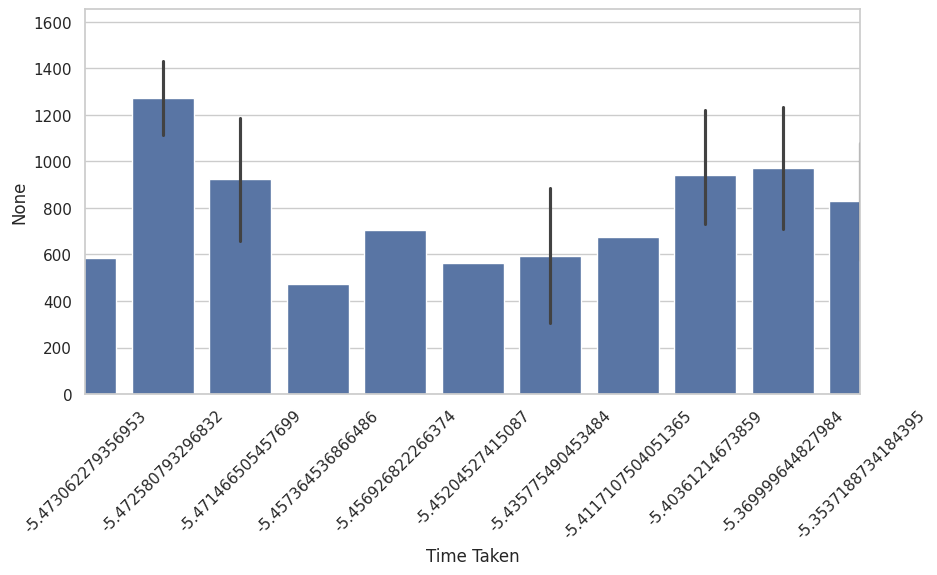

In [20]:
import pandas as pd

# Convert predictions_train array to a DataFrame
predictions_train_df = pd.DataFrame(predictions_train, columns=["Time Taken"])

# Bar plot of calculation time
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train_df.index, x="Time Taken", data=predictions_train_df)
ax.set(xlim=(0, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate the x-axis labels


Just tried to do pie chart but -_- was not a good idea

Using a pie chart for displaying calculation time might not be the most suitable choice because pie charts are typically used to show proportions of a whole. Bar plots are generally better suited for comparing values across different categories, such as comparing calculation times for different machine learning models. Therefore, sticking with the bar plot would be more appropriate for visualizing calculation times in this context.

Let's just delete this later(farhana hoque, do this, please.)

/tmp/ipykernel_17233/2170059307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=predictions_train_df["Time Taken"], y=predictions_train_df.index, palette="viridis")


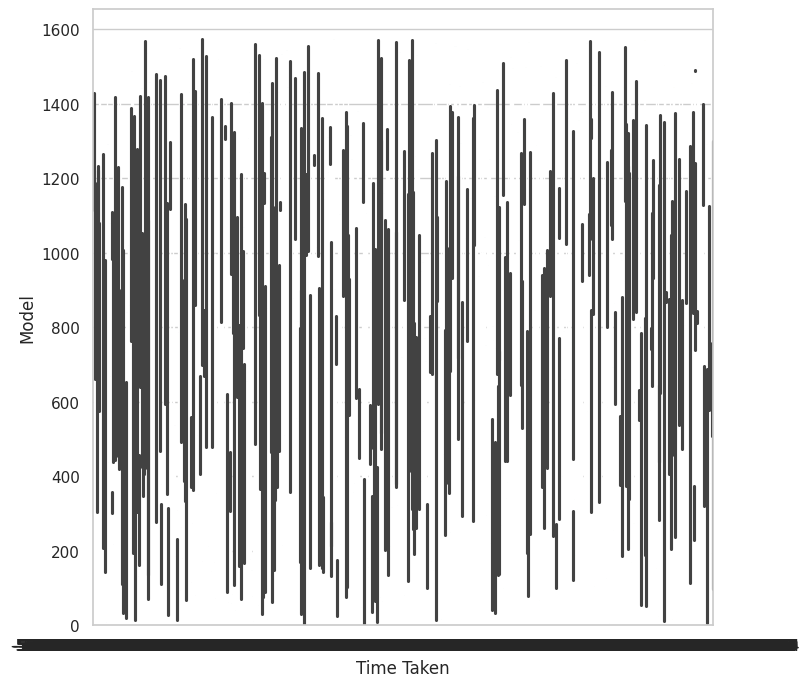

In [21]:
# Pie chart of calculation time
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=predictions_train_df["Time Taken"], y=predictions_train_df.index, palette="viridis")
ax.set_xlabel("Time Taken")
ax.set_ylabel("Model")
plt.show()
